In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

import os

# Read Data

In [2]:
#in_dir = '70f80fdf-rounds-10-evidence-1-population-5'
#in_dir = 'abf00068-rounds-10-evidence-4-population-5'
#in_dir = 'd75786f7-data-2018-01-25-big-experiment'
#in_dir = '18a75a2d-data-2018-03-19-big-experiment'
in_dir = '095ddcbc-rounds-10-evidence-4-big-experiment-high-prob'

#in_dir = 'd9145d2a-rounds-10-evidence-1-population-5'
#in_dir = 'b7d0390f-rounds-10-evidence-4-population-5'

n_evidence = 4
base_prob = 0.8

data,fails,parts = utils.get_data(in_dir, n_evidence)

In [3]:
len(data)

968

In [4]:
#data = data[data['turn'] <= 3]

In [5]:
#fails = utils.get_evidence_subset(fails, n_evidence)

In [6]:
#data = data[data['net'] > 3]

In [7]:
for i in range(1,11):
    print('Participants on turn ' + str(i) + ':', sum(data['turn'] == i)/4)

Participants on turn 1: 20.0
Participants on turn 2: 20.0
Participants on turn 3: 20.0
Participants on turn 4: 20.0
Participants on turn 5: 20.0
Participants on turn 6: 20.0
Participants on turn 7: 20.0
Participants on turn 8: 20.0
Participants on turn 9: 20.0
Participants on turn 10: 20.0


In [8]:
#data = sim_data

# Analyze Evidence

In [9]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []
nets = []
probs = []
posteriors = []

num_turns = max(data['turn'])

for net in sorted(set(data['net'])):
    
    raw_evidence,net_evidence,posterior = utils.get_evidence(fails[net], base_prob)
    
    print('Net', net)
    print(net_evidence[1][:(num_turns-1)])
    print(np.array(net_evidence[num_turns][:(num_turns-1)] * 100,dtype=int)/100.0)
    
    for t in range(num_turns+1):
        
        if t > 1:
            last_perfs += list(net_evidence[num_turns][t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    for window in range(1,num_turns):
        print('Final correlation with last',window,'evidence', np.corrcoef(net_evidence[window][t-2],mean_pop)[0,1])

    evidences += list(net_evidence[1][t-2])
    net_evidences += list(net_evidence[num_turns][t-2])
    final_pops += list(mean_pop)
    nets += [net] * len(list(mean_pop))
    probs += list(parts[net])
    posteriors += list(posterior[num_turns][t-2])

Net 4
[[ 1.    0.25  0.25  0.5   0.75  0.5   0.25  0.75]
 [ 1.    0.25  0.    1.    1.    0.75  0.25  0.75]
 [ 1.    0.5   0.25  0.25  1.    1.    0.75  0.75]
 [ 1.    0.    0.    0.75  0.75  0.5   0.5   0.5 ]
 [ 1.    0.    0.    0.75  1.    1.    0.5   0.25]
 [ 0.75  0.25  0.    1.    0.75  0.75  0.25  0.5 ]
 [ 0.75  0.25  0.    0.5   0.5   0.75  0.    0.75]
 [ 1.    0.    0.25  0.75  1.    1.    0.25  1.  ]
 [ 0.75  0.25  0.75  1.    1.    0.75  0.25  0.75]]
[[ 1.    0.25  0.25  0.5   0.75  0.5   0.25  0.75]
 [ 1.    0.25  0.12  0.75  0.87  0.62  0.25  0.75]
 [ 1.    0.33  0.16  0.58  0.91  0.75  0.41  0.75]
 [ 1.    0.25  0.12  0.62  0.87  0.68  0.43  0.68]
 [ 1.    0.2   0.1   0.65  0.9   0.75  0.45  0.6 ]
 [ 0.95  0.2   0.08  0.7   0.87  0.75  0.41  0.58]
 [ 0.92  0.21  0.07  0.67  0.82  0.75  0.35  0.6 ]
 [ 0.93  0.18  0.09  0.68  0.84  0.78  0.34  0.65]
 [ 0.91  0.19  0.16  0.72  0.86  0.77  0.33  0.66]]
[ 0.35  0.6   0.6   0.75  0.7   0.5   0.5   0.55]
[ 0.85  0.2   0.25  0.4 

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:132: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


 evidence 0.815246845757
Final correlation with last 3 evidence 0.781115161287
Final correlation with last 4 evidence 0.721566607618
Final correlation with last 5 evidence 0.695522449253
Final correlation with last 6 evidence 0.655092536461
Final correlation with last 7 evidence 0.693477326915
Final correlation with last 8 evidence 0.713431718369
Final correlation with last 9 evidence 0.705560629838
Net 7
[[ 0.75  1.    1.    0.    0.25  0.25  0.5   0.5 ]
 [ 0.75  1.    1.    0.    0.    0.25  1.    0.25]
 [ 1.    0.75  0.75  0.25  0.25  0.25  0.75  0.25]
 [ 0.5   1.    0.5   0.    0.    0.    0.75  0.25]
 [ 0.75  0.75  0.75  0.    0.    0.    1.    0.25]
 [ 0.75  1.    1.    0.5   0.75  0.    0.75  0.75]
 [ 0.75  0.75  1.    0.25  0.5   0.    0.75  0.25]
 [ 1.    0.75  1.    0.25  0.    0.25  1.    0.  ]
 [ 1.    0.75  0.75  0.    0.25  0.5   0.5   0.  ]]
[[ 0.75  1.    1.    0.    0.25  0.25  0.5   0.5 ]
 [ 0.75  1.    1.    0.    0.12  0.25  0.75  0.37]
 [ 0.83  0.91  0.91  0.08  0.

In [10]:
colors = np.array(['']*len(probs))
colors[np.array(probs) > 0.5] = 'blue'
colors[np.array(probs) <= 0.5] = 'red'

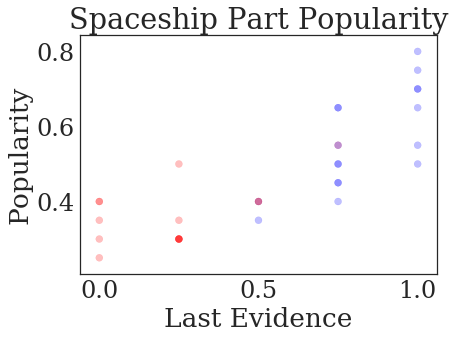

In [11]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(evidences,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [12]:
np.corrcoef(posteriors,final_pops)

array([[ 1.       ,  0.6768763],
       [ 0.6768763,  1.       ]])

In [13]:
np.corrcoef(net_evidences,final_pops)

array([[ 1.        ,  0.69040436],
       [ 0.69040436,  1.        ]])

In [14]:
np.corrcoef(evidences,final_pops)

array([[ 1.        ,  0.81635189],
       [ 0.81635189,  1.        ]])

In [15]:
np.corrcoef([x for i in range(4,8) for x in parts[i]],final_pops)

array([[ 1.        ,  0.67687628],
       [ 0.67687628,  1.        ]])

In [16]:
np.corrcoef([x for net in range(4,8) for x in utils.get_evidence(fails[net], base_prob)[1][1][num_turns-2] ],final_pops)

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:132: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


array([[ 1.        ,  0.81635189],
       [ 0.81635189,  1.        ]])

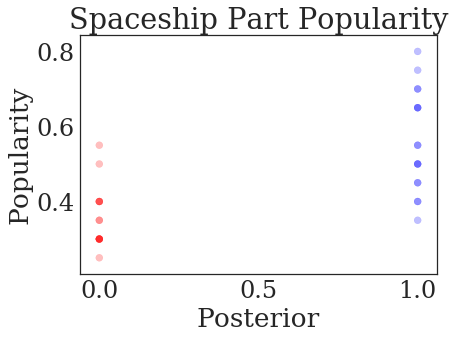

In [17]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(posteriors,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Posterior')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

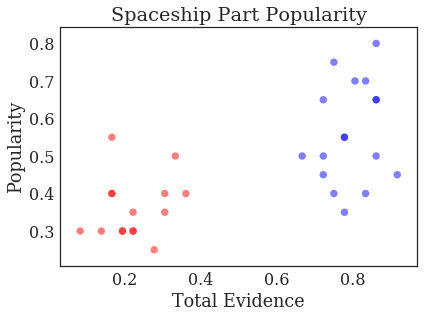

In [18]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(net_evidences,final_pops,s=50,alpha=0.5,c=colors)
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
plt.savefig('pop-evidence.jpg', bbox_inches = 'tight')

In [19]:
pd.DataFrame({'evidence':net_evidences,'popularity':final_pops, 'game':nets}).to_csv('evidence-pops.csv')

In [20]:
os.system('Rscript analyze.R > tmp')
with open('tmp') as f:
    for l in f.readlines():
        print(l)

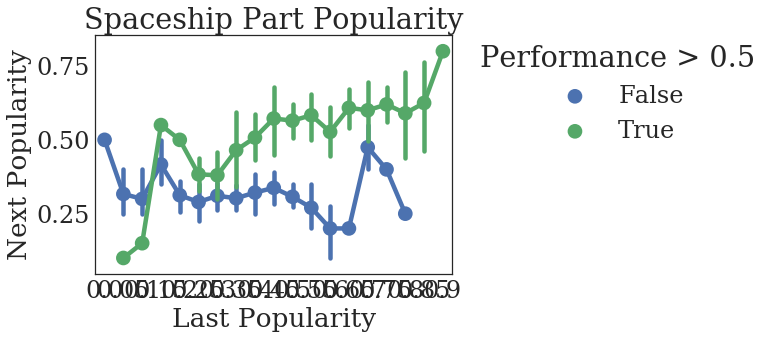

In [21]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,np.array(last_perfs) > 0.5)
plt.xlabel('Last Popularity')
plt.ylabel('Next Popularity')
plt.title('Spaceship Part Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Performance > 0.5')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [22]:
np.array(pops)[np.array(last_pops) == 0]

array([ 0.5])

# Analyze Reward

In [23]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in range(num_turns+1):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,parts,net,t)]

rewards = np.transpose(np.array(rewards))

In [24]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: 0.01078125
Turn 2: 0.04453125
Turn 3: 0.05296875
Turn 4: 0.05765625
Turn 5: 0.04453125
Turn 6: 0.0346875
Turn 7: 0.0365625
Turn 8: 0.024375
Turn 9: 0.043125
Turn 10: 0.03890625


In [25]:
rewards

array([[  4.31250000e-02,  -4.50000000e-02,   5.43750000e-02,
         -9.37500000e-03],
       [  7.68750000e-02,  -1.87500000e-02,   7.31250000e-02,
          4.68750000e-02],
       [  6.75000000e-02,   2.06250000e-02,   7.31250000e-02,
          5.06250000e-02],
       [  7.50000000e-02,   3.75000000e-02,   7.50000000e-02,
          4.31250000e-02],
       [  6.56250000e-02,   8.67361738e-18,   7.31250000e-02,
          3.93750000e-02],
       [  6.18750000e-02,  -2.25000000e-02,   7.31250000e-02,
          2.62500000e-02],
       [  6.37500000e-02,  -5.62500000e-03,   5.25000000e-02,
          3.56250000e-02],
       [  3.56250000e-02,   5.62500000e-03,   4.68750000e-02,
          9.37500000e-03],
       [  8.25000000e-02,  -3.75000000e-03,   6.00000000e-02,
          3.37500000e-02],
       [  4.87500000e-02,   1.87500000e-03,   6.93750000e-02,
          3.56250000e-02]])

In [26]:
all_rewards = pd.DataFrame([[i,j,r] for i in range(len(rewards)) for j,r in enumerate(rewards[i])])
all_rewards.columns = ['turn','net','reward']

In [27]:
[sum(parts[i] == 0.8) for i in parts]

[3, 2, 4, 6, 4, 5, 3, 5]

In [28]:
all_rewards.groupby(['turn','net']).mean()

reward
turn net              
0    0    4.312500e-02
     1   -4.500000e-02
     2    5.437500e-02
     3   -9.375000e-03
1    0    7.687500e-02
     1   -1.875000e-02
     2    7.312500e-02
     3    4.687500e-02
2    0    6.750000e-02
     1    2.062500e-02
     2    7.312500e-02
     3    5.062500e-02
3    0    7.500000e-02
     1    3.750000e-02
     2    7.500000e-02
     3    4.312500e-02
4    0    6.562500e-02
     1    8.673617e-18
     2    7.312500e-02
     3    3.937500e-02
5    0    6.187500e-02
     1   -2.250000e-02
     2    7.312500e-02
     3    2.625000e-02
6    0    6.375000e-02
     1   -5.625000e-03
     2    5.250000e-02
     3    3.562500e-02
7    0    3.562500e-02
     1    5.625000e-03
     2    4.687500e-02
     3    9.375000e-03
8    0    8.250000e-02
     1   -3.750000e-03
     2    6.000000e-02
     3    3.375000e-02
9    0    4.875000e-02
     1    1.875000e-03
     2    6.937500e-02
     3    3.562500e-02

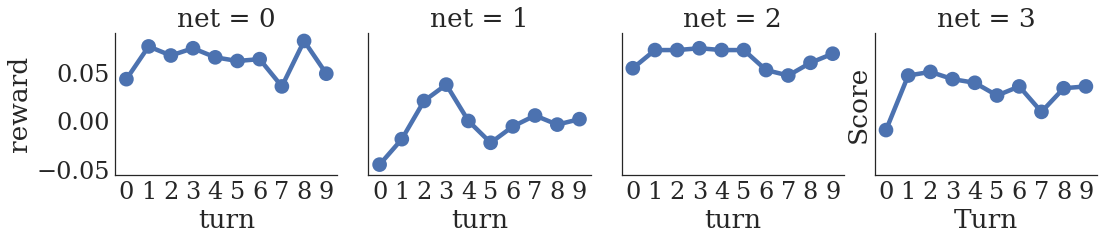

In [48]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn','reward',col='net',data=all_rewards)
plt.xlabel('Turn')
plt.ylabel('Score')
plt.savefig('score-over-time.jpg', bbox_inches = 'tight')


In [30]:
print(stats.linregress(all_rewards['turn'], all_rewards['reward']))

LinregressResult(slope=0.00016477272727272654, intercept=0.038071022727272745, rvalue=0.014748366890728419, pvalue=0.92802985314094399, stderr=0.0018121842898984062)


In [31]:
all_rewards.to_csv('all_rewards.csv')

In [32]:

turn = []
seen = []
perf = []
choice = []
net = []
item = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            net += [row['net']]
            item += [j]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice,'net':net,'item':item})

----
7 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['success' 'success' 'success' 'success']
 ['success' 'success' 'success' 'fail']
 ['success' 'success' 'success' 'success']
 ['success' 'fail' 'fail' 'fail']
 ['success' 'fail' 'fail' 'success']
 ['fail' 'fail' 'success' 'fail']
 ['success' 'success' 'success' 'success']
 ['fail' 'fail' 'fail' 'fail']]
[0, 1, 1, 1, 1, 1, 0, 0]
----
6 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail' 'fail' 'fail' 'success']
 ['success' 'success' 'success' 'success']
 ['fail' 'fail' 'fail' 'fail']
 ['fail' 'success' 'success' 'success']
 ['success' 'success' 'success' 'success']
 ['success' 'success' 'success' 'success']
 ['fail' 'fail' 'fail' 'fail']
 ['fail' 'success' 'success' 'su

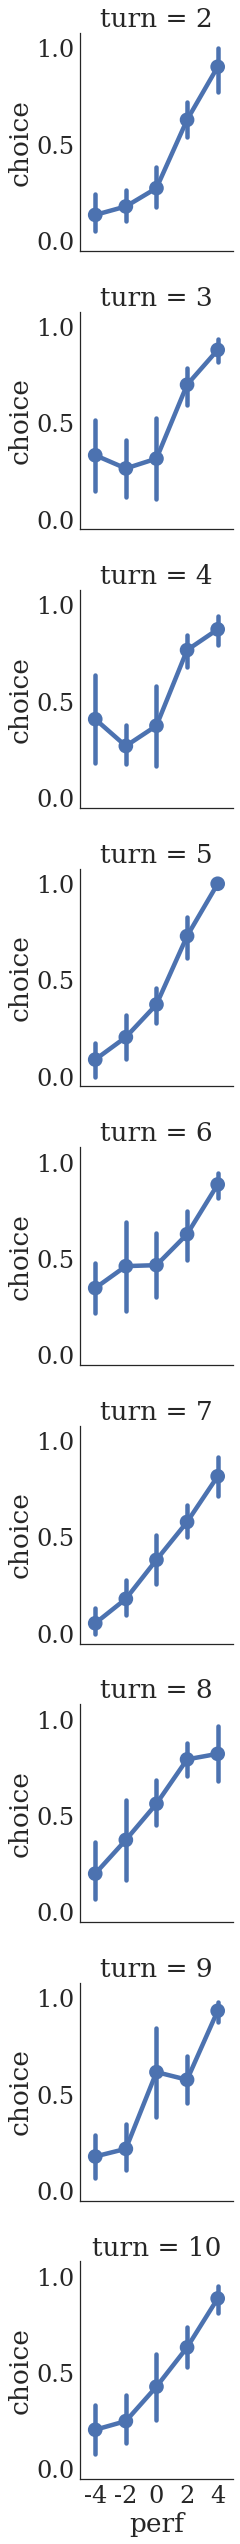

In [33]:
sns.factorplot('perf', 'choice', row = 'turn', data = indiv_choices[seen])


In [34]:
agg = indiv_choices[seen].groupby(['perf','turn','item','net']).mean()
agg

choice  seen
perf turn item net                
-4   2    2    6    0.111111  True
          3    5    0.000000  True
               7    0.214286  True
          4    5    0.111111  True
     3    0    6    0.666667  True
          2    4    0.400000  True
          3    7    0.500000  True
          4    5    0.230769  True
               7    0.000000  True
     4    0    6    0.600000  True
          2    5    0.400000  True
          3    5    0.333333  True
          7    5    0.250000  True
     5    1    4    0.142857  True
          2    4    0.000000  True
          3    7    0.111111  True
          4    7    0.142857  True
          5    7    0.000000  True
          6    6    0.000000  True
     6    0    6    0.000000  True
          1    4    0.333333  True
               5    0.444444  True
          2    4    0.666667  True
               5    0.454545  True
          3    7    0.250000  True
          4    7    0.166667  True
          5    7    0.333333  True
     7    0    6    0.200000  True
          1    5    0.000000  True
          2    4    0.000000  True
...                      ...   ...
 4   6    4    4    0.882353  True
               6    1.000000  True
          5    4    1.000000  True
               6    0.833333  True
          6    7    1.000000  True
     7    1    7    0.916667  True
          2    7    0.500000  True
          3    4    0.666667  True
               6    0.857143  True
          5    6    0.928571  True
     8    2    7    1.000000  True
          5    6    0.857143  True
          7    6    0.727273  True
     9    0    4    1.000000  True
               7    1.000000  True
          1    6    1.000000  True
          2    7    0.800000  True
          4    4    0.900000  True
          5    4    1.000000  True
               6    0.923077  True
          6    7    0.923077  True
          7    4    0.916667  True
               6    1.000000  True
     10   0    7    1.000000  True
          1    6    0.857143  True
          3    4    1.000000  True
          4    4    0.800000  True
               6    1.000000  True
          6    5    0.800000  True
          7    6    0.933333  True

[285 rows x 2 columns]

In [35]:
np.mean(agg.loc[[-4,-2],:,:,:]['choice'] == 0)

0.23364485981308411

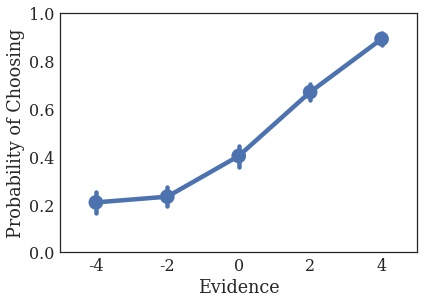

In [36]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('perf', 'choice', data = indiv_choices[seen])
plt.ylim(0,1)
plt.xlabel('Evidence')
plt.ylabel('Probability of Choosing')
plt.savefig('response-curve.jpg', bbox_inches = 'tight')

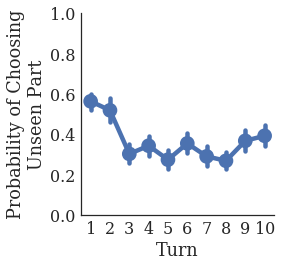

In [37]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn', 'choice', data = indiv_choices[~np.array(seen)])
plt.xlabel('Turn')
plt.ylabel('Probability of Choosing\nUnseen Part')
plt.ylim(0,1)
plt.savefig('unseen-parts.jpg', bbox_inches = 'tight')

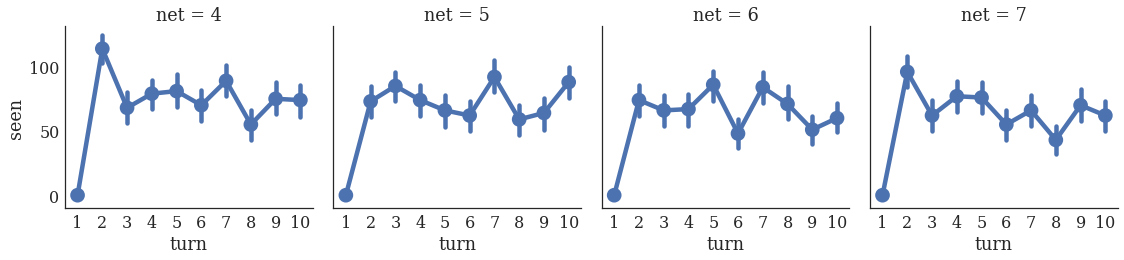

In [38]:
sns.factorplot('turn', 'seen', col = 'net', data = indiv_choices, estimator = sum)

In [39]:
num_turns = max(data['turn'])
num_agents = int(sum(data['turn'] == max(data['turn'])) / len(set(nets)))
num_actions = 8
actions = []

for n in set(nets):
        
    for t in range(num_turns):
        
        this_actions = []
    
        for i in range(num_agents):
            
            action = [n,t,i,[]]
        
            for j in range(num_actions):
                
                if t > 0:
                    viewed_fails = last_actions[np.random.choice(num_agents)]
                    
                if t == 0:
                    choice = np.random.random() < 0.5
                elif not viewed_fails[j]:
                    choice = np.random.random() < 0.5
                else:
                    signal = np.mean(fails[n][t][j] == 'success')
                    if signal == 1.0:
                        choice = np.random.random() < 0.8
                    elif signal == 0.75:
                        choice = np.random.random() < 0.75
                    elif signal == 0.5:
                        choice = np.random.random() < 0.5
                    elif signal == 0.25:
                        choice = np.random.random() < 0.25
                    elif signal == 0.0:
                        choice = np.random.random() < 0.2
                    else:
                        assert False
                    
                action[-1] += [choice]
                
            this_actions += [action[-1]]
            actions += [action]
            
        last_actions = this_actions
            

In [40]:
sim_data = pd.DataFrame(actions)
sim_data.columns = ['net','turn','agent','action']

In [41]:
len(last_actions)

20

In [42]:
sim_rewards = []

for net in sorted(set(data['net'])):
    
    sim_rewards += [[]]
    for t in range(num_turns):
        sim_rewards[-1] += [utils.get_reward(sim_data,parts,net,t)]

sim_rewards = np.transpose(np.array(sim_rewards))

In [43]:
sim_rewards

array([[ 0.045   , -0.058125,  0.031875,  0.005625],
       [ 0.105   , -0.02625 ,  0.06375 ,  0.0525  ],
       [ 0.061875,  0.03    ,  0.06375 ,  0.039375],
       [ 0.073125, -0.020625,  0.046875,  0.01875 ],
       [ 0.080625, -0.016875,  0.07875 ,  0.06    ],
       [ 0.065625, -0.0225  ,  0.05625 ,  0.01875 ],
       [ 0.061875, -0.01875 ,  0.06375 ,  0.050625],
       [ 0.069375, -0.015   ,  0.061875,  0.028125],
       [ 0.076875, -0.009375,  0.088125,  0.03    ],
       [ 0.061875, -0.009375,  0.0825  ,  0.024375]])

In [44]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(sim_rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: 0.00609375
Turn 2: 0.04875
Turn 3: 0.04875
Turn 4: 0.02953125
Turn 5: 0.050625
Turn 6: 0.02953125
Turn 7: 0.039375
Turn 8: 0.03609375
Turn 9: 0.04640625
Turn 10: 0.03984375


In [45]:
all_sim_rewards = pd.DataFrame([[i,j,r] for i in range(len(sim_rewards)) for j,r in enumerate(sim_rewards[i])])
all_sim_rewards.columns = ['turn','net','reward']

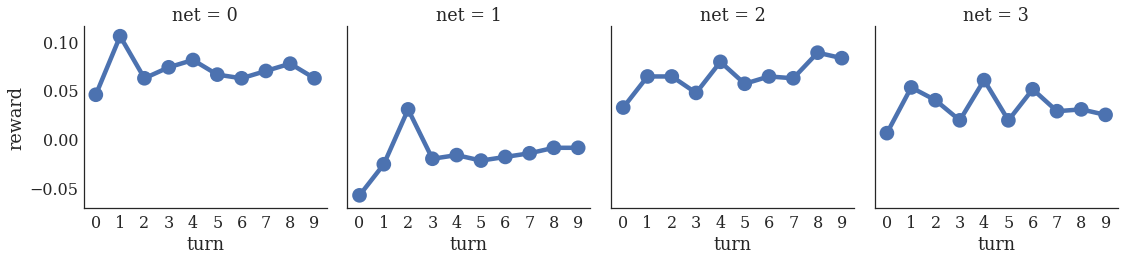

In [46]:
sns.factorplot('turn','reward',col='net',data=all_sim_rewards)

In [47]:
print(stats.linregress(all_sim_rewards['turn'], all_sim_rewards['reward']))

LinregressResult(slope=0.0014090909090909089, intercept=0.031159090909090928, rvalue=0.10559771287280693, pvalue=0.51666304230616011, stderr=0.0021525721600189705)
